The following code helps you to load and visualize the data (skeleton) in 3D xyz coordinates.
 

In [2]:
import matplotlib.pyplot as plt

# Print the list of available styles
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [36]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os
# plt.style.use('seaborn-poster')
plt.style.use('seaborn-v0_8-poster')

#filename and folder to plot
fname= "walking_1"
folder = "/Users/haivanle/Documents/AMATH582/hw2data/train/"

vals = np.load(folder+fname+".npy")
xyz = np.reshape( vals[:,:], (38,3,-1) )


print(xyz.shape)

#define the root joint and scaling of the values
r = 1000
xroot, yroot, zroot = xyz[0,0,0], xyz[0,0,1], xyz[0,0,2]

#define the connections between the joints (skeleton) 
I = np.array(
        [1, 2, 3, 4, 5, 6, 1, 8, 9, 10, 11, 12, 1, 14, 15, 16, 17, 18, 19, 16, 21, 22, 23, 25, 26, 24, 28, 16, 30, 31,
         32, 33, 34, 35, 33, 37]) - 1
J = np.array(
        [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32,
         33, 34, 35, 36, 37, 38]) - 1


(38, 3, 100)


In [37]:
vals.shape

(114, 100)

In [38]:
xyz.shape

(38, 3, 100)

In [39]:
# Compile all the train samples into a matrix X_train
actions = ['walking', 'jumping', 'running']
file_ranges = {'walking': range(2, 6), 'jumping': range(1, 6), 'running': range(1, 6)}
for action in actions:
    # Loop through each file in the specified range
    for i in file_ranges[action]:
        fname = f"{action}_{i}"
        current_vals = np.load(f"/Users/haivanle/Documents/AMATH582/hw2data/train/{fname}.npy")
        vals = np.hstack((vals, current_vals))
print(vals.shape)

(114, 1500)


In [6]:
# plot the skeleton accroding to joints (each plot is png image in anim folder)

for tind in range(1,xyz.shape[2]):
    
    fig = plt.figure(figsize = (10,10))
    ax = plt.axes(projection='3d')
    for ijind in range(0,I.shape[0]):
        xline = np.array([xyz[I[ijind],0,tind], xyz[J[ijind],0,tind]])
        yline = np.array([xyz[I[ijind],1,tind], xyz[J[ijind],1,tind]])
        zline = np.array([xyz[I[ijind],2,tind], xyz[J[ijind],2,tind]])
        # use plot if you'd like to plot skeleton with lines
        ax.plot(xline,yline,zline)
    
    # use scatter if you'd like to plot all points without lines 
    # ax.scatter(xyz[:,0,tind],xyz[:,1,tind],xyz[:,2,tind], c = 'r', s = 50)   

    ax.set_xlim([-r+xroot, r+xroot])
    ax.set_zlim([-r+zroot, r+zroot])
    ax.set_ylim([-r+yroot, r+yroot])
    
    plt.savefig('anim/'+f"{tind}.png")
    plt.close()

# when plotting a single sample (the skeleton can simply be plotted without saving an image)
#     plt.draw()
#     plt.pause(.001)
#     plt.show()

 
    
# save the animated plot as a gif in anim folder 
from PIL import Image

images = [Image.open('anim/'+f"{n}.png") for n in range(1,xyz.shape[2])]
images[0].save('anim/'+fname+'.gif', save_all=True, append_images=images[1:], duration=30, loop=0) 

# remove ploted png images
for n in range(1,xyz.shape[2]):
    os.remove('anim/'+f"{n}.png")





In [20]:
import sklearn

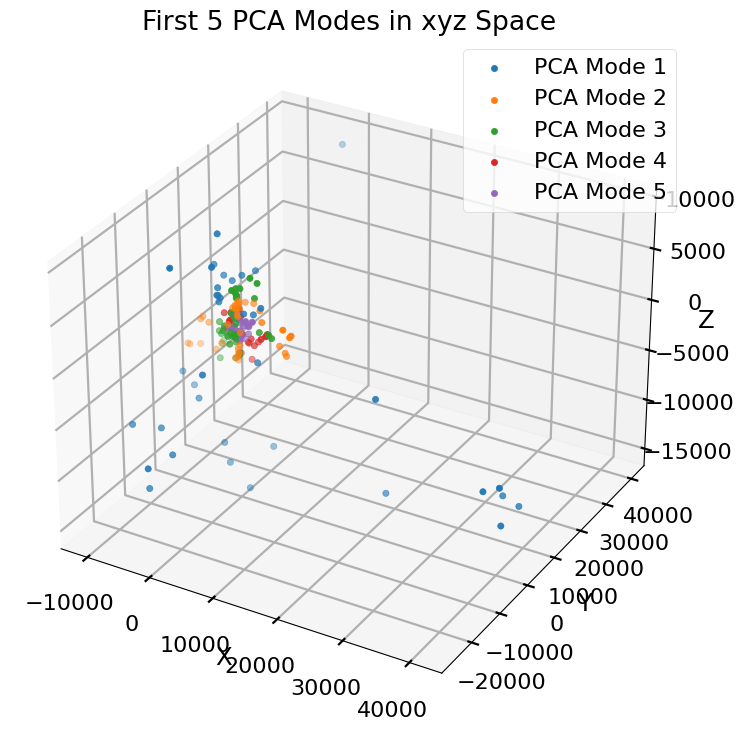

In [21]:
from sklearn.decomposition import PCA

# Assuming vals has been stacked as described in the previous responses

# Reshape vals to (n_samples, n_features), where n_samples is the number of frames and n_features is the total dimensionality
n_samples, n_features = vals.shape
vals_reshaped = np.reshape(vals, (n_samples, -1))

# Use PCA to reduce dimensionality
n_components = 5  # Number of components for PCA
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(vals_reshaped)

# Reshape PCA result back to (n_frames, n_components)
pca_result_reshaped = np.reshape(pca_result.T, (n_components, 3, -1))

# Plot the first 5 PCA modes in xyz space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(n_components):
    ax.scatter(pca_result_reshaped[i, 0, :], pca_result_reshaped[i, 1, :], pca_result_reshaped[i, 2, :], label=f'PCA Mode {i + 1}')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.title('First 5 PCA Modes in xyz Space')
plt.savefig('582hw2f1.pdf')
plt.show()


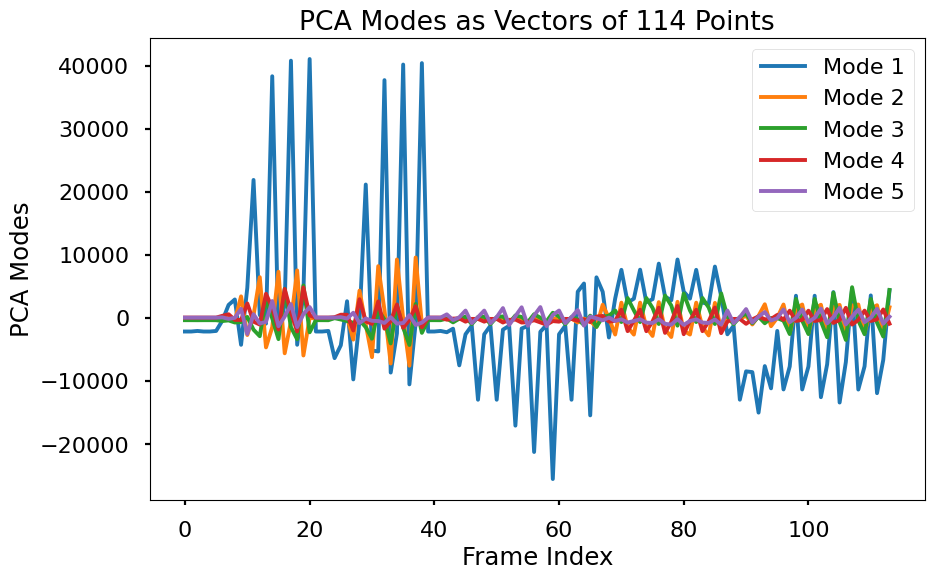

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming vals has been stacked as described in the previous responses

# Reshape vals to (n_samples, n_features), where n_samples is the number of frames and n_features is the total dimensionality
n_samples, n_features = vals.shape
vals_reshaped = np.reshape(vals, (n_samples, -1))

# Use PCA to calculate 5 modes
n_modes = 5
pca = PCA(n_components=n_modes)
pca_result = pca.fit_transform(vals_reshaped)

# Plot the first 5 PCA modes as vectors of 114 points with their index
fig, axs = plt.subplots(figsize=(10, 6))

for mode in range(n_modes):
    axs.plot(np.arange(n_samples), pca_result[:, mode], label=f'Mode {mode + 1}')

axs.set_xlabel('Frame Index')
axs.set_ylabel('PCA Modes')
axs.legend()
axs.set_title('PCA Modes as Vectors of 114 Points')

plt.show()


Number of PCA modes to achieve 70.0% energy: 1
Number of PCA modes to achieve 80.0% energy: 1
Number of PCA modes to achieve 90.0% energy: 2
Number of PCA modes to achieve 95.0% energy: 2


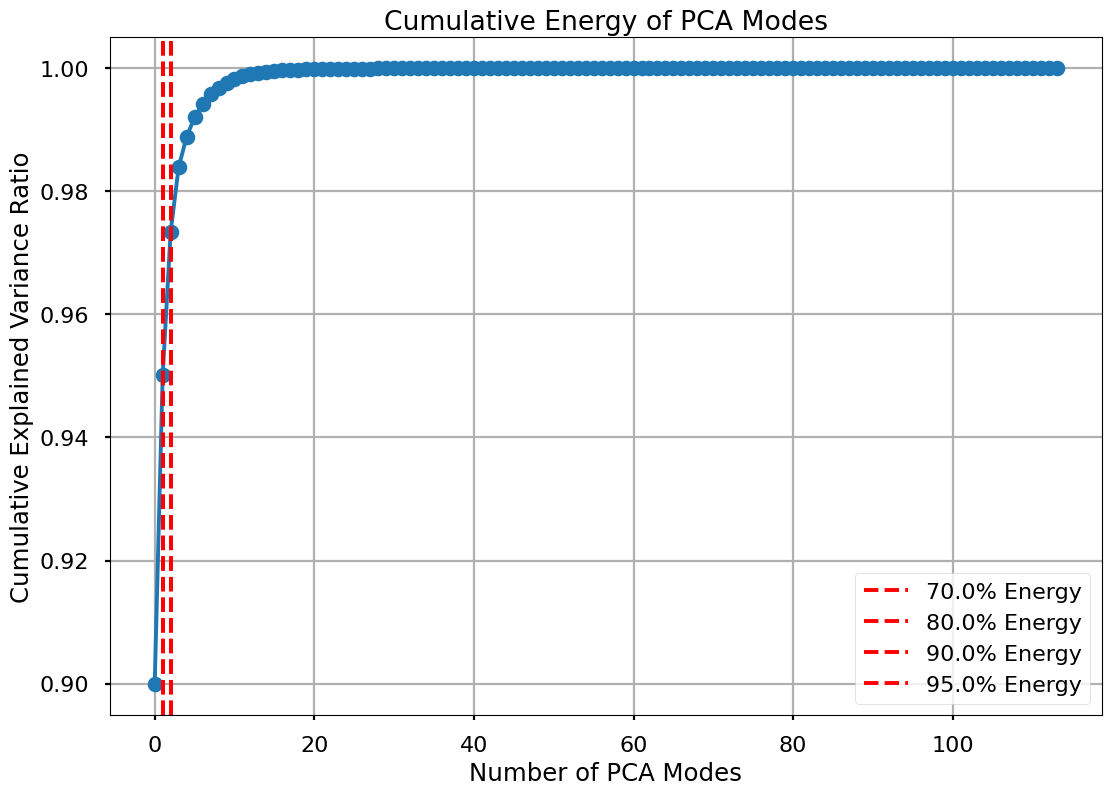

In [23]:
# Assuming vals has been stacked as described in the previous responses

# Reshape vals to (n_samples, n_features), where n_samples is the number of frames and n_features is the total dimensionality
n_samples, n_features = vals.shape
vals_reshaped = np.reshape(vals, (n_samples, -1))

# Use PCA to calculate explained variance ratio
pca = PCA()
pca.fit(vals_reshaped)

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative energy
plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel('Number of PCA Modes')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Energy of PCA Modes')
plt.grid(True)

# Add horizontal lines for specified thresholds (70%, 80%, 90%, 95%)
thresholds = [0.7, 0.8, 0.9, 0.95]
for threshold in thresholds:
    num_modes = np.argmax(cumulative_variance_ratio >= threshold) + 1
    print(f'Number of PCA modes to achieve {threshold * 100}% energy: {num_modes}')
    plt.axvline(x=num_modes, color='r', linestyle='--', label=f'{threshold * 100}% Energy')

plt.legend()
plt.savefig('582hw2f2.pdf')
plt.show()


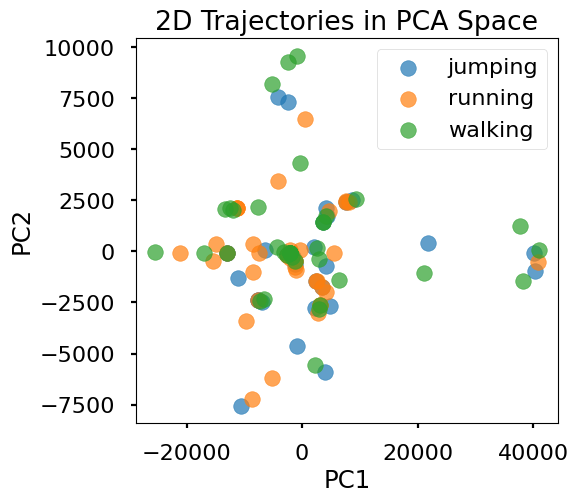

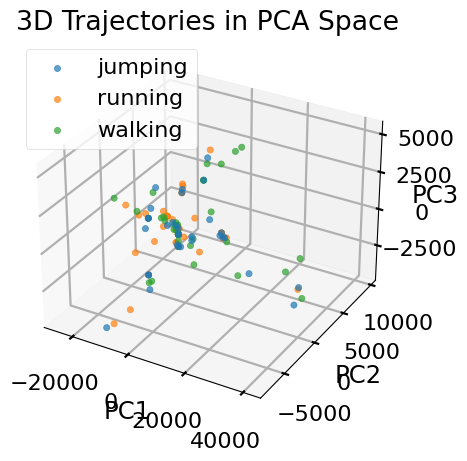

In [24]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming vals has been stacked as described in the previous responses
# Also, assuming you have labels for different movements (replace labels with your actual labels)

# Generate random labels for illustration
labels = np.random.choice(['walking', 'jumping', 'running'], size=n_samples)

# Reshape vals to (n_samples, n_features), where n_samples is the number of frames, and n_features is the total dimensionality
n_samples, n_features = vals.shape
vals_reshaped = np.reshape(vals, (n_samples, -1))

# Use PCA to calculate 2 modes and 3 modes
pca_2_modes = PCA(n_components=2)
pca_3_modes = PCA(n_components=3)

pca_result_2_modes = pca_2_modes.fit_transform(vals_reshaped)
pca_result_3_modes = pca_3_modes.fit_transform(vals_reshaped)

# Plot 2D trajectories
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for label in np.unique(labels):
    mask = (labels == label)
    plt.scatter(pca_result_2_modes[mask, 0], pca_result_2_modes[mask, 1], label=label, alpha=0.7)

plt.title('2D Trajectories in PCA Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

# Plot 3D trajectories
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 2, projection='3d')
for label in np.unique(labels):
    mask = (labels == label)
    ax.scatter(pca_result_3_modes[mask, 0], pca_result_3_modes[mask, 1], pca_result_3_modes[mask, 2], label=label, alpha=0.7)

ax.set_title('3D Trajectories in PCA Space')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.savefig('582hw2f3.pdf')
plt.show()


In [26]:
# Assuming vals has been stacked as described in the previous responses
# Also, assuming you have labels for different movements (replace labels with your actual labels)

# Generate random labels for illustration
# labels = np.random.choice(['walking', 'jumping', 'running'], size=n_samples)

# Map labels to integers
label_mapping = {'walking': 0, 'jumping': 1, 'running': 2}
ground_truth_labels = np.array([label_mapping[label] for label in labels])

# Reshape vals to (n_samples, n_features), where n_samples is the number of frames, and n_features is the total dimensionality
n_samples, n_features = vals.shape
vals_reshaped = np.reshape(vals, (n_samples, -1))

# Use PCA to calculate k modes
k_modes = 3  # Adjust this based on your requirements
pca_k_modes = PCA(n_components=k_modes)

# Fit PCA and transform the data
pca_result_k_modes = pca_k_modes.fit_transform(vals_reshaped)

# Compute centroids in k-modes PCA space for each movement
centroids = []
for movement in np.unique(ground_truth_labels):
    mask = (ground_truth_labels == movement)
    centroid = np.mean(pca_result_k_modes[mask], axis=0)
    centroids.append(centroid)

centroids = np.array(centroids)

# Print the computed centroids
for i, centroid in enumerate(centroids):
    print(f"Centroid for movement {i} in {k_modes}-modes PCA space: {centroid}")


Centroid for movement 0 in 3-modes PCA space: [710.87484636 690.73850318 103.28069099]
Centroid for movement 1 in 3-modes PCA space: [1851.38338159 -409.01275383 -143.46193619]
Centroid for movement 2 in 3-modes PCA space: [-2022.52063299  -322.10217445    13.08918627]


In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Assuming vals has been stacked as described in the previous responses
# Also, assuming you have labels for different movements (replace labels with your actual labels)

# Generate random labels for illustration
# labels = np.random.choice(['walking', 'jumping', 'running'], size=n_samples)

# Map labels to integers
# label_mapping = {'walking': 0, 'jumping': 1, 'running': 2}
# ground_truth_labels = np.array([label_mapping[label] for label in labels])

# Reshape vals to (n_samples, n_features), where n_samples is the number of frames, and n_features is the total dimensionality
# n_samples, n_features = vals.shape
# vals_reshaped = np.reshape(vals, (n_samples, -1))

# Define the range of k values for PCA truncation
k_values = [2, 3, 5, 10, 20]  # Adjust based on your requirements

# Evaluate classifier accuracy for each k value
for k in k_values:
    # Use PCA to calculate k modes
    pca_k_modes = PCA(n_components=k)

    # Fit PCA and transform the data
    pca_result_k_modes = pca_k_modes.fit_transform(vals_reshaped)

    # Fit KMeans clustering on the transformed data
    kmeans = KMeans(n_clusters=len(np.unique(ground_truth_labels)))
    kmeans.fit(pca_result_k_modes)

    # Assign trained labels based on the cluster centers (centroids)
    trained_labels = kmeans.predict(pca_result_k_modes)

    # Compute accuracy
    accuracy = accuracy_score(ground_truth_labels, trained_labels)
    print(f"For k={k}, accuracy: {accuracy * 100:.2f}%")


For k=2, accuracy: 35.09%
For k=3, accuracy: 35.09%
For k=5, accuracy: 37.72%
For k=10, accuracy: 37.72%
For k=20, accuracy: 35.09%


In [40]:
# Data path
folder = "/Users/haivanle/Documents/AMATH582/hw2data/train/"

# List of actions
actions = ['walking', 'jumping', 'running']

# Concatenate all training data
X_train = np.empty((114, 0))
for action in actions:
    for i in range(1, 6):
        fname = f"{action}_{i}.npy"
        current_X_train = np.load(os.path.join(folder, fname))
        X_train = np.hstack((X_train, current_X_train))

In [41]:
# Perform PCA
pca = PCA(n_components=5)  # Number of components = 5 for first 5 PCA modes
X_train_centered = X_train - np.mean(X_train, axis=1, keepdims=True)  # Centering the data
pca.fit(X_train_centered.T)  # Transpose X_train to have shape (n_samples, n_features) for sklearn PCA


PCA(n_components=5)

In [42]:
# Perform Singular Value Decomposition (SVD)
# Use code from SVD notebook
centered_data = X_train - np.mean(X_train, axis=1)[:, None] 

U, S, Vt = np.linalg.svd(centered_data)

# Compute the explained variance ratio from the singular values
explained_variance_ratio = (S ** 2) / np.sum(S ** 2)

# Compute cumulative explained variance ratio
cumulative_energy = np.cumsum(explained_variance_ratio)


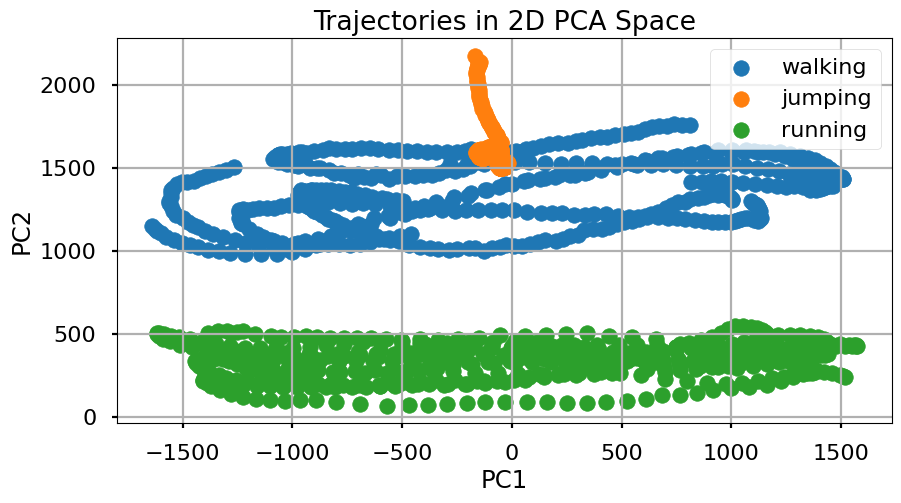

In [44]:
# Concatenate all training data
X_train = np.empty((114, 0))
y_train = []  # List to store labels
for action_index, action in enumerate(actions):
    for i in range(1, 6):
        fname = f"{action}_{i}.npy"
        current_X_train = np.load(os.path.join(folder, fname))
        X_train = np.hstack((X_train, current_X_train))
        # Add label for each action
        y_train.extend([action_index] * current_X_train.shape[1])

# Perform PCA with 2 and 3 components
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

# Fit PCA models
X_train_centered = X_train.T - np.mean(X_train.T, axis=0)
pca_2d.fit(X_train_centered)
pca_3d.fit(X_train_centered)

# Project data onto 2D and 3D PCA space
X_2d = pca_2d.transform(X_train.T)
X_3d = pca_3d.transform(X_train.T)

# Plot 2D trajectories
plt.figure(figsize=(10, 5))
for action_index, action in enumerate(actions):
    action_indices = [i for i, label in enumerate(y_train) if label == action_index]
    plt.scatter(X_2d[action_indices, 0], X_2d[action_indices, 1], label=action)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Trajectories in 2D PCA Space')
plt.legend()
plt.grid(True)
# plt.savefig('582hw2f3.pdf')
plt.show()

In [46]:
# List of actions and their corresponding integer labels
action_labels = {action: i for i, action in enumerate(actions)}

# Load and concatenate all training data
# X_train = []
# y_train = []
# for action in actions:
#     for i in range(1, 6):
#         fname = f"{action}_{i}.npy"
#         current_X_train = np.load(os.path.join(folder, fname))
#         X_train.append(current_X_train.T)
#         y_train.extend([action_labels[action]] * current_X_train.shape[1])

# Convert list to numpy array
# X_train = np.concatenate(X_train, axis=0)

# Perform PCA with k modes
k = 3  # Specify the number of modes
pca = PCA(n_components=k)
X_pca = pca.fit_transform(X_train)

# Initialize centroids dictionary
centroids = {action: np.zeros(k) for action in actions}

# Compute centroids for each movement
for action in actions:
    indices = [i for i, label in enumerate(y_train) if label == action_labels[action]]
    centroids[action] = np.mean(X_pca[indices], axis=0)

# Print centroids
for action, centroid in centroids.items():
    print(f"Centroid for {action}: {centroid}")

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.08374697  0.07623348  0.07072661 ... 27.95903525 43.74354899
 60.03439788].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.